In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#6ecadc","#e9a820","#e01563","#edb196","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]
test_output = pd.DataFrame(pd.read_csv("../data_files/test_output.csv"))

test_output = test_output.transpose()
test_output= test_output.reset_index(level=0)
display(test_output)
test_output = test_output.dropna()
column_name = list(test_output.iloc[0])
column_name = [ i.strip() for i in column_name]
test_output = test_output.drop(index=0)
test_output.columns = column_name
test_output["Tau_n"] = pd.to_numeric(test_output["Tau_n"])
display(test_output)

,index,0,1,2,3,4
0,Tau_n,Tau_M,Tau_H,Inf_n,Inf_M,Inf_H
1,4.77368,0.027085,1.92996,0.016192,0.000265,0.998242
2,4.82611,0.028631,2.02834,0.017742,0.000305,0.997958
3,4.87841,0.030265,2.13163,0.019431,0.000351,0.997628
4,4.93051,0.031993,2.24006,0.02127,0.000403,0.997246
...,...,...,...,...,...,...
138,1.10214,0.138434,1.00068,0.959021,0.997471,0.000548
139,1.09069,0.136571,1.00059,0.95995,0.99764,0.000522
140,1.07946,0.134755,1.00051,0.960855,0.997797,0.000496
141,1.06846,0.132986,1.00044,0.961735,0.997944,0.000472


,Tau_n,Tau_M,Tau_H,Inf_n,Inf_M,Inf_H
1,4.77368,0.027085,1.92996,0.016192,0.000265,0.998242
2,4.82611,0.028631,2.02834,0.017742,0.000305,0.997958
3,4.87841,0.030265,2.13163,0.019431,0.000351,0.997628
4,4.93051,0.031993,2.24006,0.02127,0.000403,0.997246
5,4.98232,0.033818,2.35386,0.023271,0.000464,0.996802
...,...,...,...,...,...,...
137,1.11382,0.140347,1.00078,0.958065,0.99729,0.000577
138,1.10214,0.138434,1.00068,0.959021,0.997471,0.000548
139,1.09069,0.136571,1.00059,0.95995,0.99764,0.000522
140,1.07946,0.134755,1.00051,0.960855,0.997797,0.000496


# Data Processing

# Graph 1
(first 3)

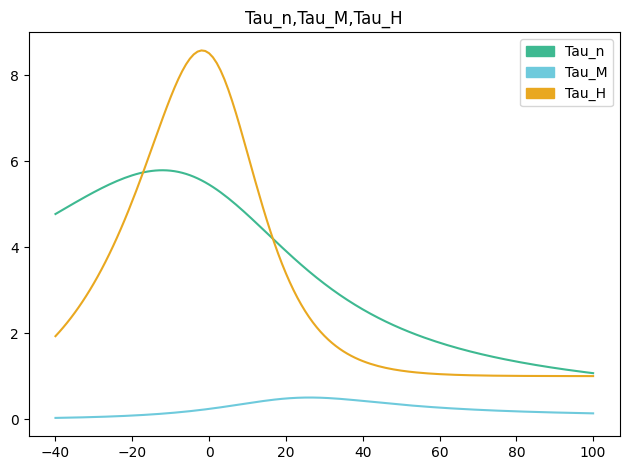

In [2]:
first_3 =list(test_output.columns )[:3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 2

(141,)


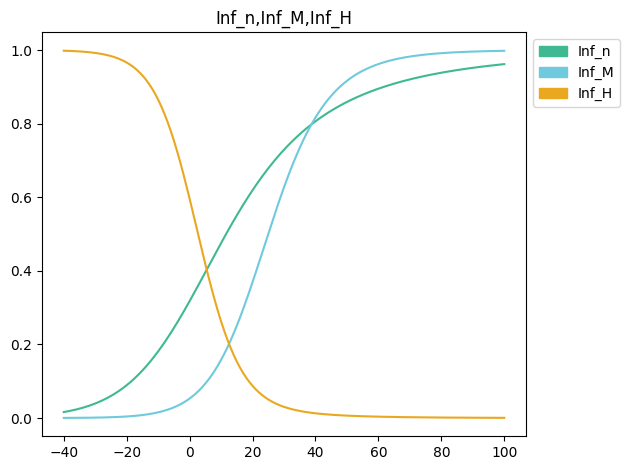

In [3]:
first_3 = list(test_output.columns)[3:3+3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)
print(x.shape)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 6 Voltages

In [4]:
voltage = pd.DataFrame(pd.read_csv("../data_files/testV_output.csv"))[:4]

voltage = voltage.transpose().reset_index(level=0)


column =list(voltage.iloc[0])
column = [ i.strip() for i in column]
voltage = voltage.dropna()
voltage = voltage.drop(index=0)
voltage.columns = column
issue_col = list(voltage.columns)[0]

voltage[issue_col] = pd.to_numeric(voltage[issue_col])

#display(voltage) # this shows the voltage 
def graph_v_output(i, voltage):
    first_3 =  [list(voltage.columns)[i]]
    fig, ax = plt.subplots()
    size = len(voltage)
    x = np.arange(0,size/10, step=0.1)

    for i in range(len(first_3)):
        label = first_3[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        print(label)
        ax.plot(x,voltage[label],color = color_list[i])
        plt.xlabel('time (ms)')
        plt.ylabel('voltage (mV)')

        

    colorlist = zip(first_3,color_list)
    handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
    t = ",".join(first_3)
    ax.set_title(t)
    plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/{t}.png")


V


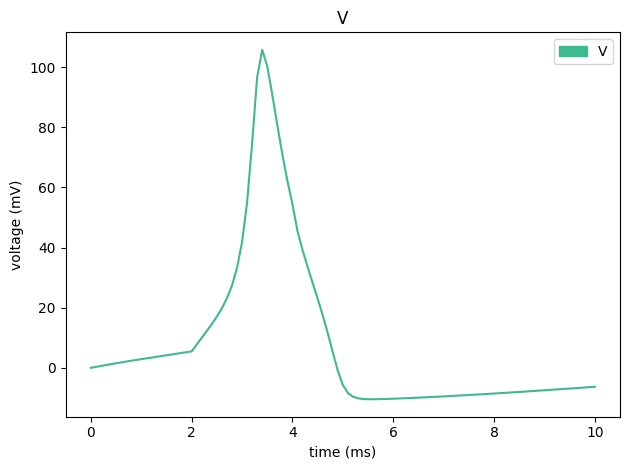

In [5]:
graph_v_output(0, voltage)


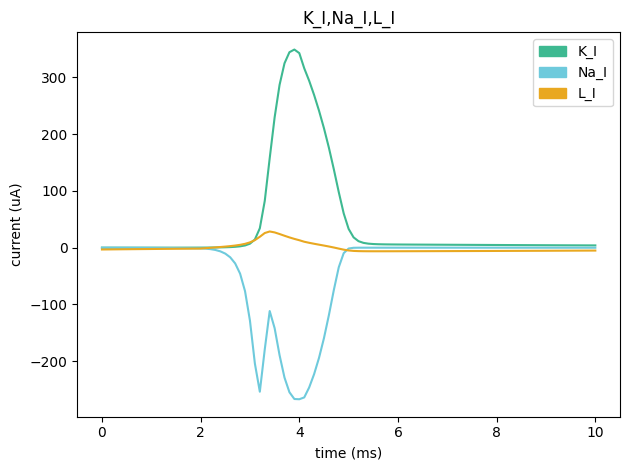

In [6]:
first_3 =  list(voltage.columns)[1:]
fig, ax = plt.subplots()
size = len(voltage)
x = np.arange(0,size/10, step=0.1)

for i in range(len(first_3)):
    label = first_3[i]
    ax.plot(x,voltage[label],color = color_list[i])
    plt.xlabel('time (ms)')
    plt.ylabel('current (uA)')
    

colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
ax.set_title(t)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")